In [1]:
%load_ext autoreload
%autoreload 2
%xmode verbose

Exception reporting mode: Verbose


In [2]:
# from ExoRM.get_data import get_data
# get_data()

# from ExoRM.initialize_model import initialize_model
# initialize_model(kwargs = {'cores': 4}) # change as needed

# Use these to initialize / update the model

In [3]:
from ExoRM import read_rm_data, ForecasterRM, preprocess_data, ExoRM

erm = ExoRM()
erm.load_trace()

import numpy
import matplotlib.pyplot as plot
import matplotlib
import pandas
import seaborn
import math
import time

save = False # save the figures / csv to files
plot.style.use('seaborn-v0_8-paper')
seaborn.set_theme(style = 'white', context = 'paper')
matplotlib.rcParams['figure.figsize'] = [4, 3]
matplotlib.rcParams['axes.labelsize'] = 10  # Axis label font size
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['figure.dpi'] = 500
matplotlib.rcParams['figure.constrained_layout.use'] = True

matplotlib.rcParams['lines.markersize'] = 1.2  # Default marker size (scatter size)
matplotlib.rcParams['lines.linewidth'] = 2   # Default line width

path = 'Paper Material/ExoRM'

data = read_rm_data()
data = preprocess_data(data)
data = data[['name', 'radius', 'mass', 'density', 'error_score']]

data

,name,radius,mass,density,error_score
0,2MASS J02192210-3925225 b,16.140960,4417.837000,1.050562,0.049985
1,55 Cnc e,1.875000,7.990000,1.212113,0.028071
2,BD-14 3065 b,21.590000,3932.000000,0.390711,0.060558
3,CFHTWIR-Oph 98 b,20.848704,2479.061575,0.273558,0.061518
4,CoRoT-1 b,19.223435,390.930900,0.055031,0.049397
...,...,...,...,...,...
964,XO-3 b,13.988832,3759.928900,1.373521,0.036115
965,XO-4 b,15.020060,512.341960,0.151198,0.027186
966,XO-5 b,12.780000,378.200000,0.181188,0.025901
967,XO-7 b,15.356304,225.658169,0.062315,0.032076


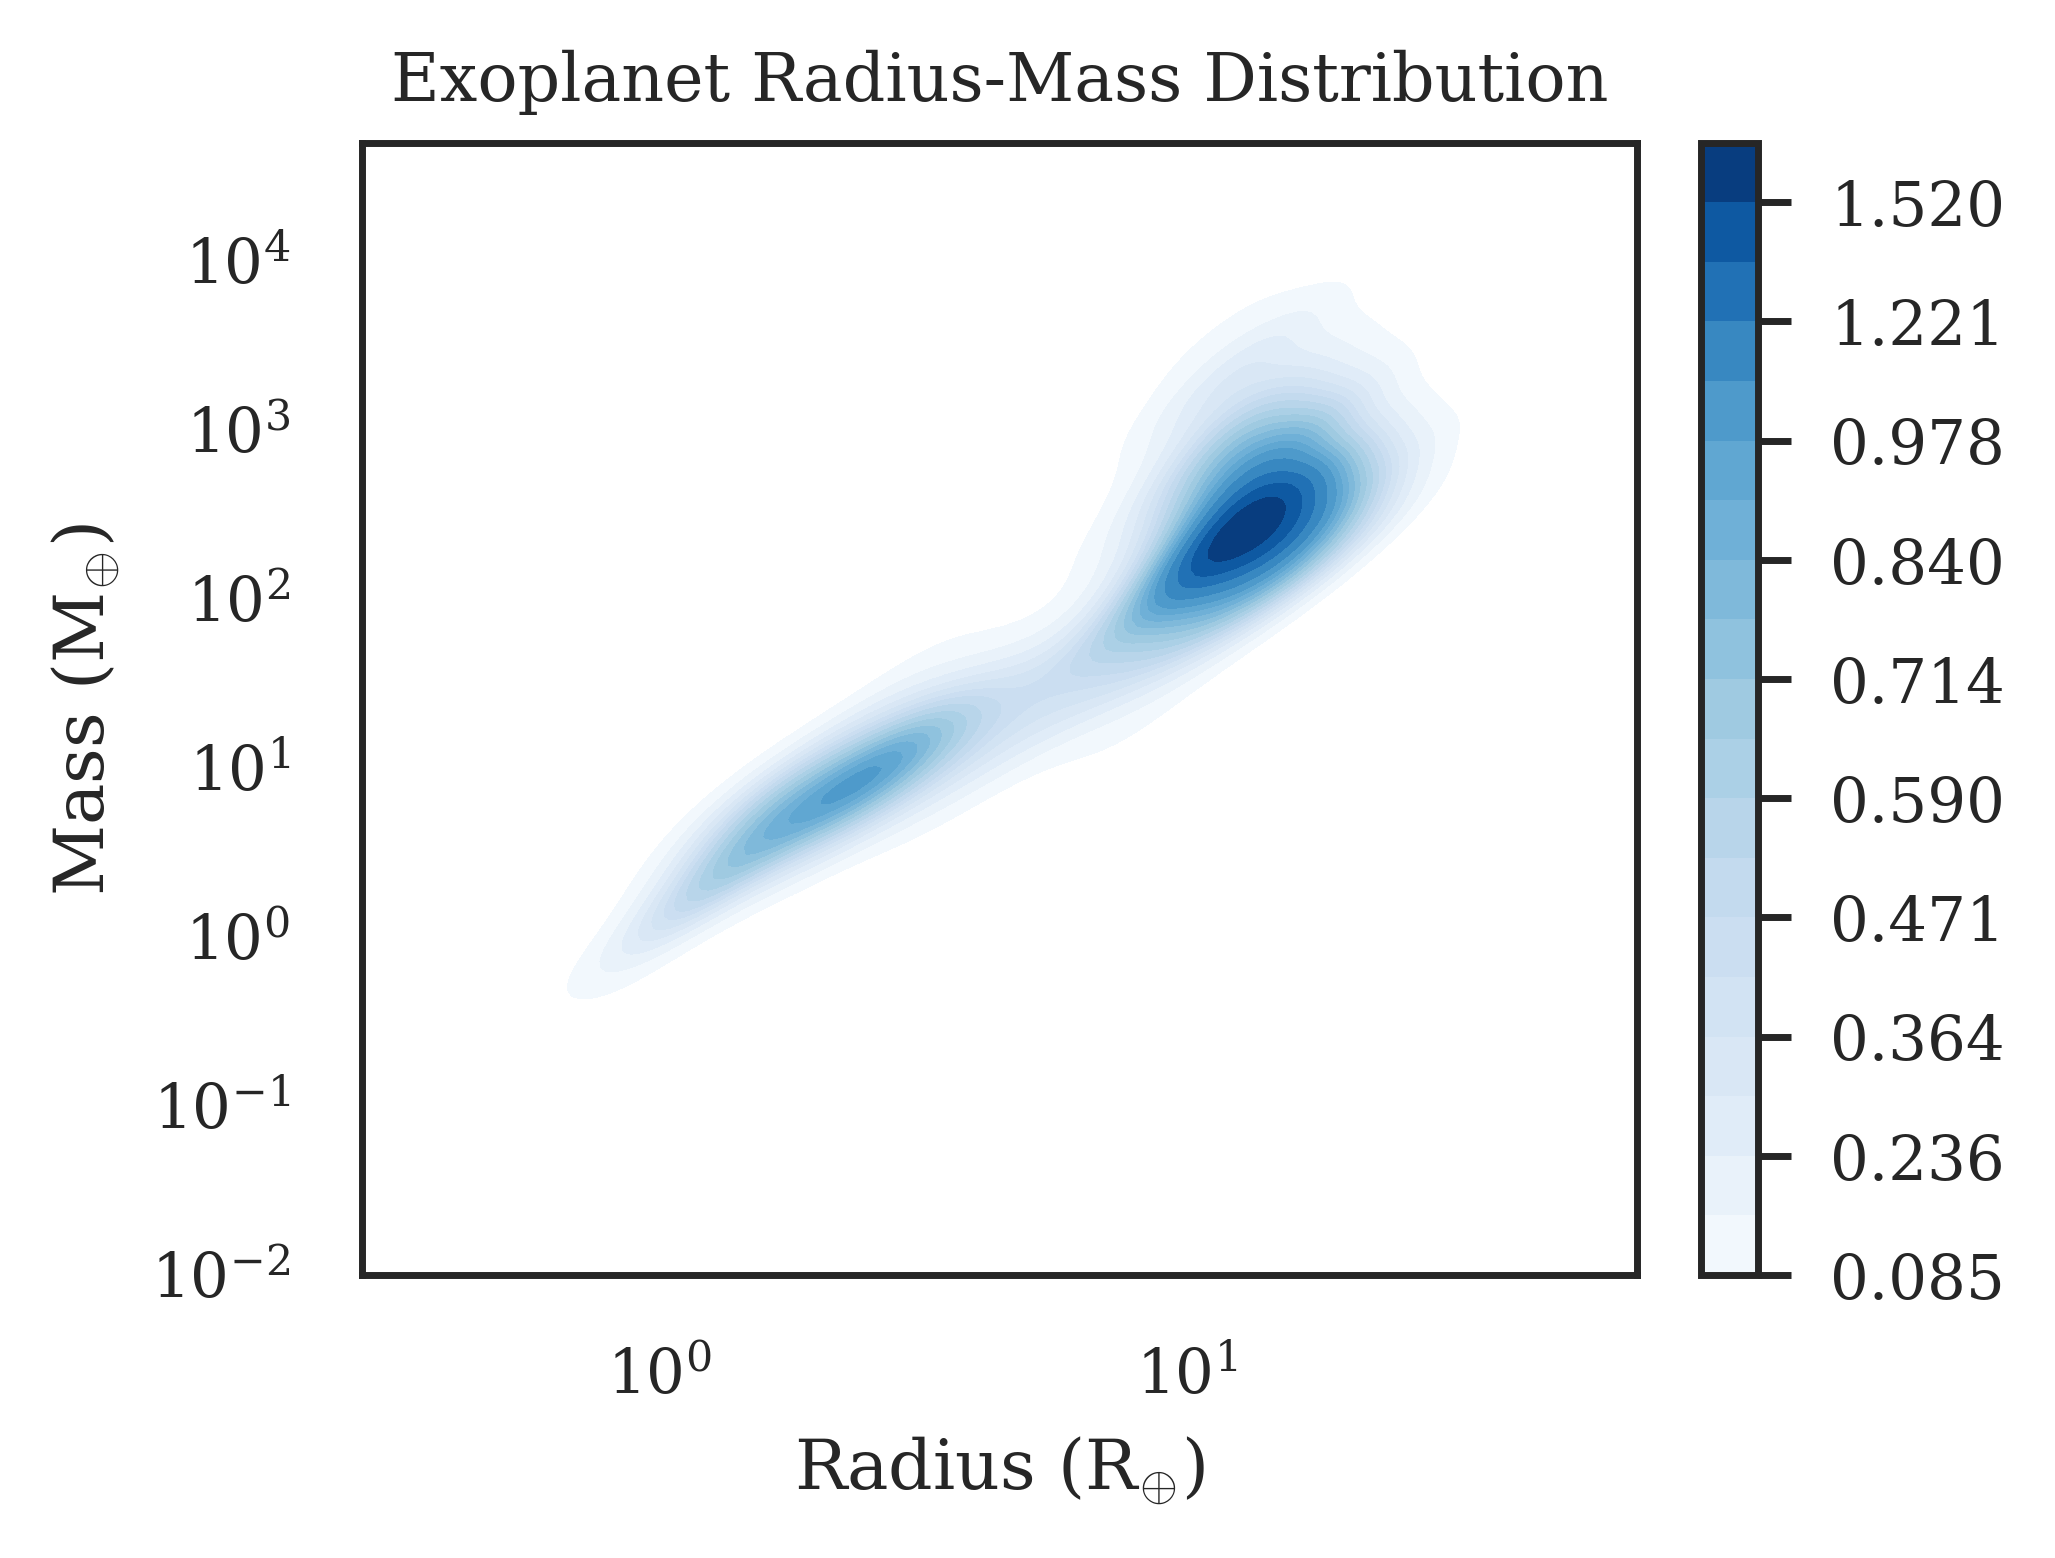

In [4]:
columns = ['radius', 'mass']

x = data['radius']
y = data['mass']

x = numpy.log10(x)
y = numpy.log10(y)
ax = seaborn.kdeplot(data, x = 'radius', y = 'mass', fill = True, cmap = 'Blues', levels = 20, cbar = True, log_scale = True)
# seaborn.scatterplot(numpy.log10(data[columns]), x = 'radius', y = 'mass', s = 5, color = 'black', zorder = 2)
# plot.gca().set_aspect('auto')

# plot.xlim(-0.3, 1.6)
# plot.ylim(-0.75, 4.25)

plot.xlabel('Radius (R$_{\\oplus}$)')
plot.ylabel('Mass (M$_{\\oplus}$)')
plot.title('Exoplanet Radius-Mass Distribution')

# if save: plot.savefig(f'{path}/Figure 1.jpeg')

plot.show()

Sampling: [_x_true, y_pred]


Output()

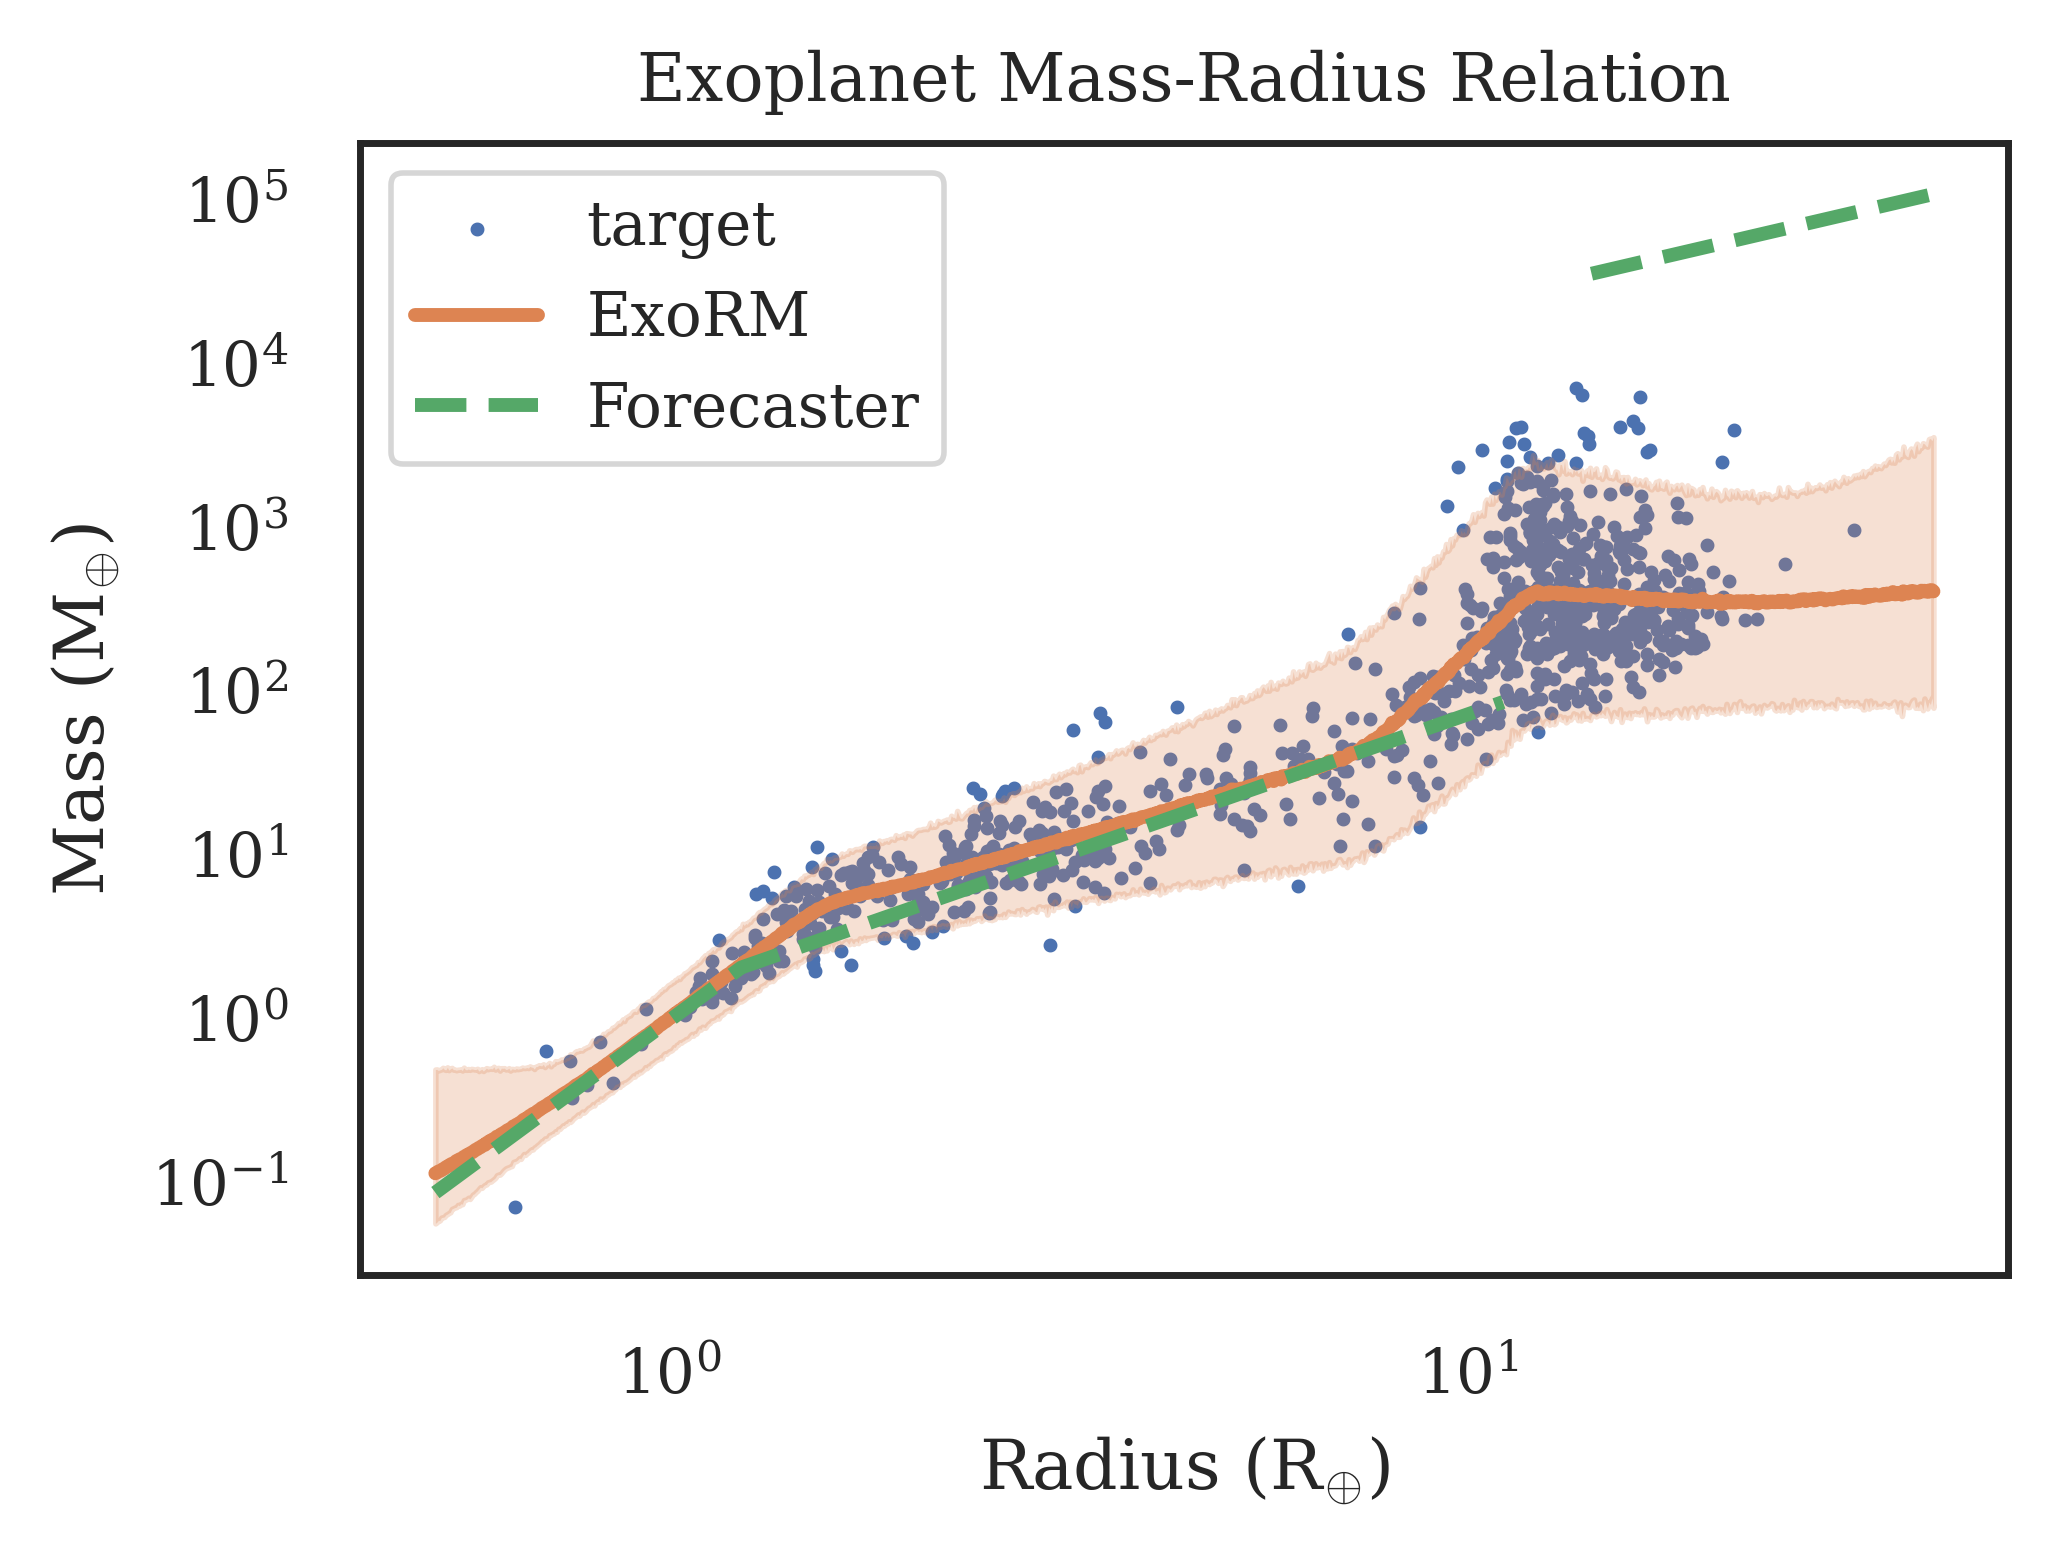

In [5]:
xs = numpy.linspace(x.min() - 0.1, x.max() + 0.1, 1000)

ms, lower, upper = erm.predict_full_linear(10 ** xs)
ms2 = ForecasterRM.forecaster(xs)

plot.scatter(10 ** x, 10 ** y)
plot.plot(10 ** xs, ms, color = 'C1')
plot.plot(10 ** xs, 10 ** ms2, '--', color = 'C2')

plot.fill_between(10 ** xs, lower, upper, color = 'C1', alpha = 0.25)

plot.legend(['target', 'ExoRM', 'Forecaster'])
plot.xlabel('Radius (R$_{\\oplus}$)')
plot.ylabel('Mass (M$_{\\oplus}$)')
plot.title('Exoplanet Mass-Radius Relation')

plot.loglog()

if save: plot.savefig(f'{path}/Figure 2.jpeg')

plot.show()

In [6]:
m, l, u = erm.predict_full(x)
out_error = len(x[(y < l) | (y > u)])
1 - (out_error / len(x))

Sampling: [_x_true, y_pred]


Output()

0.936016511867905

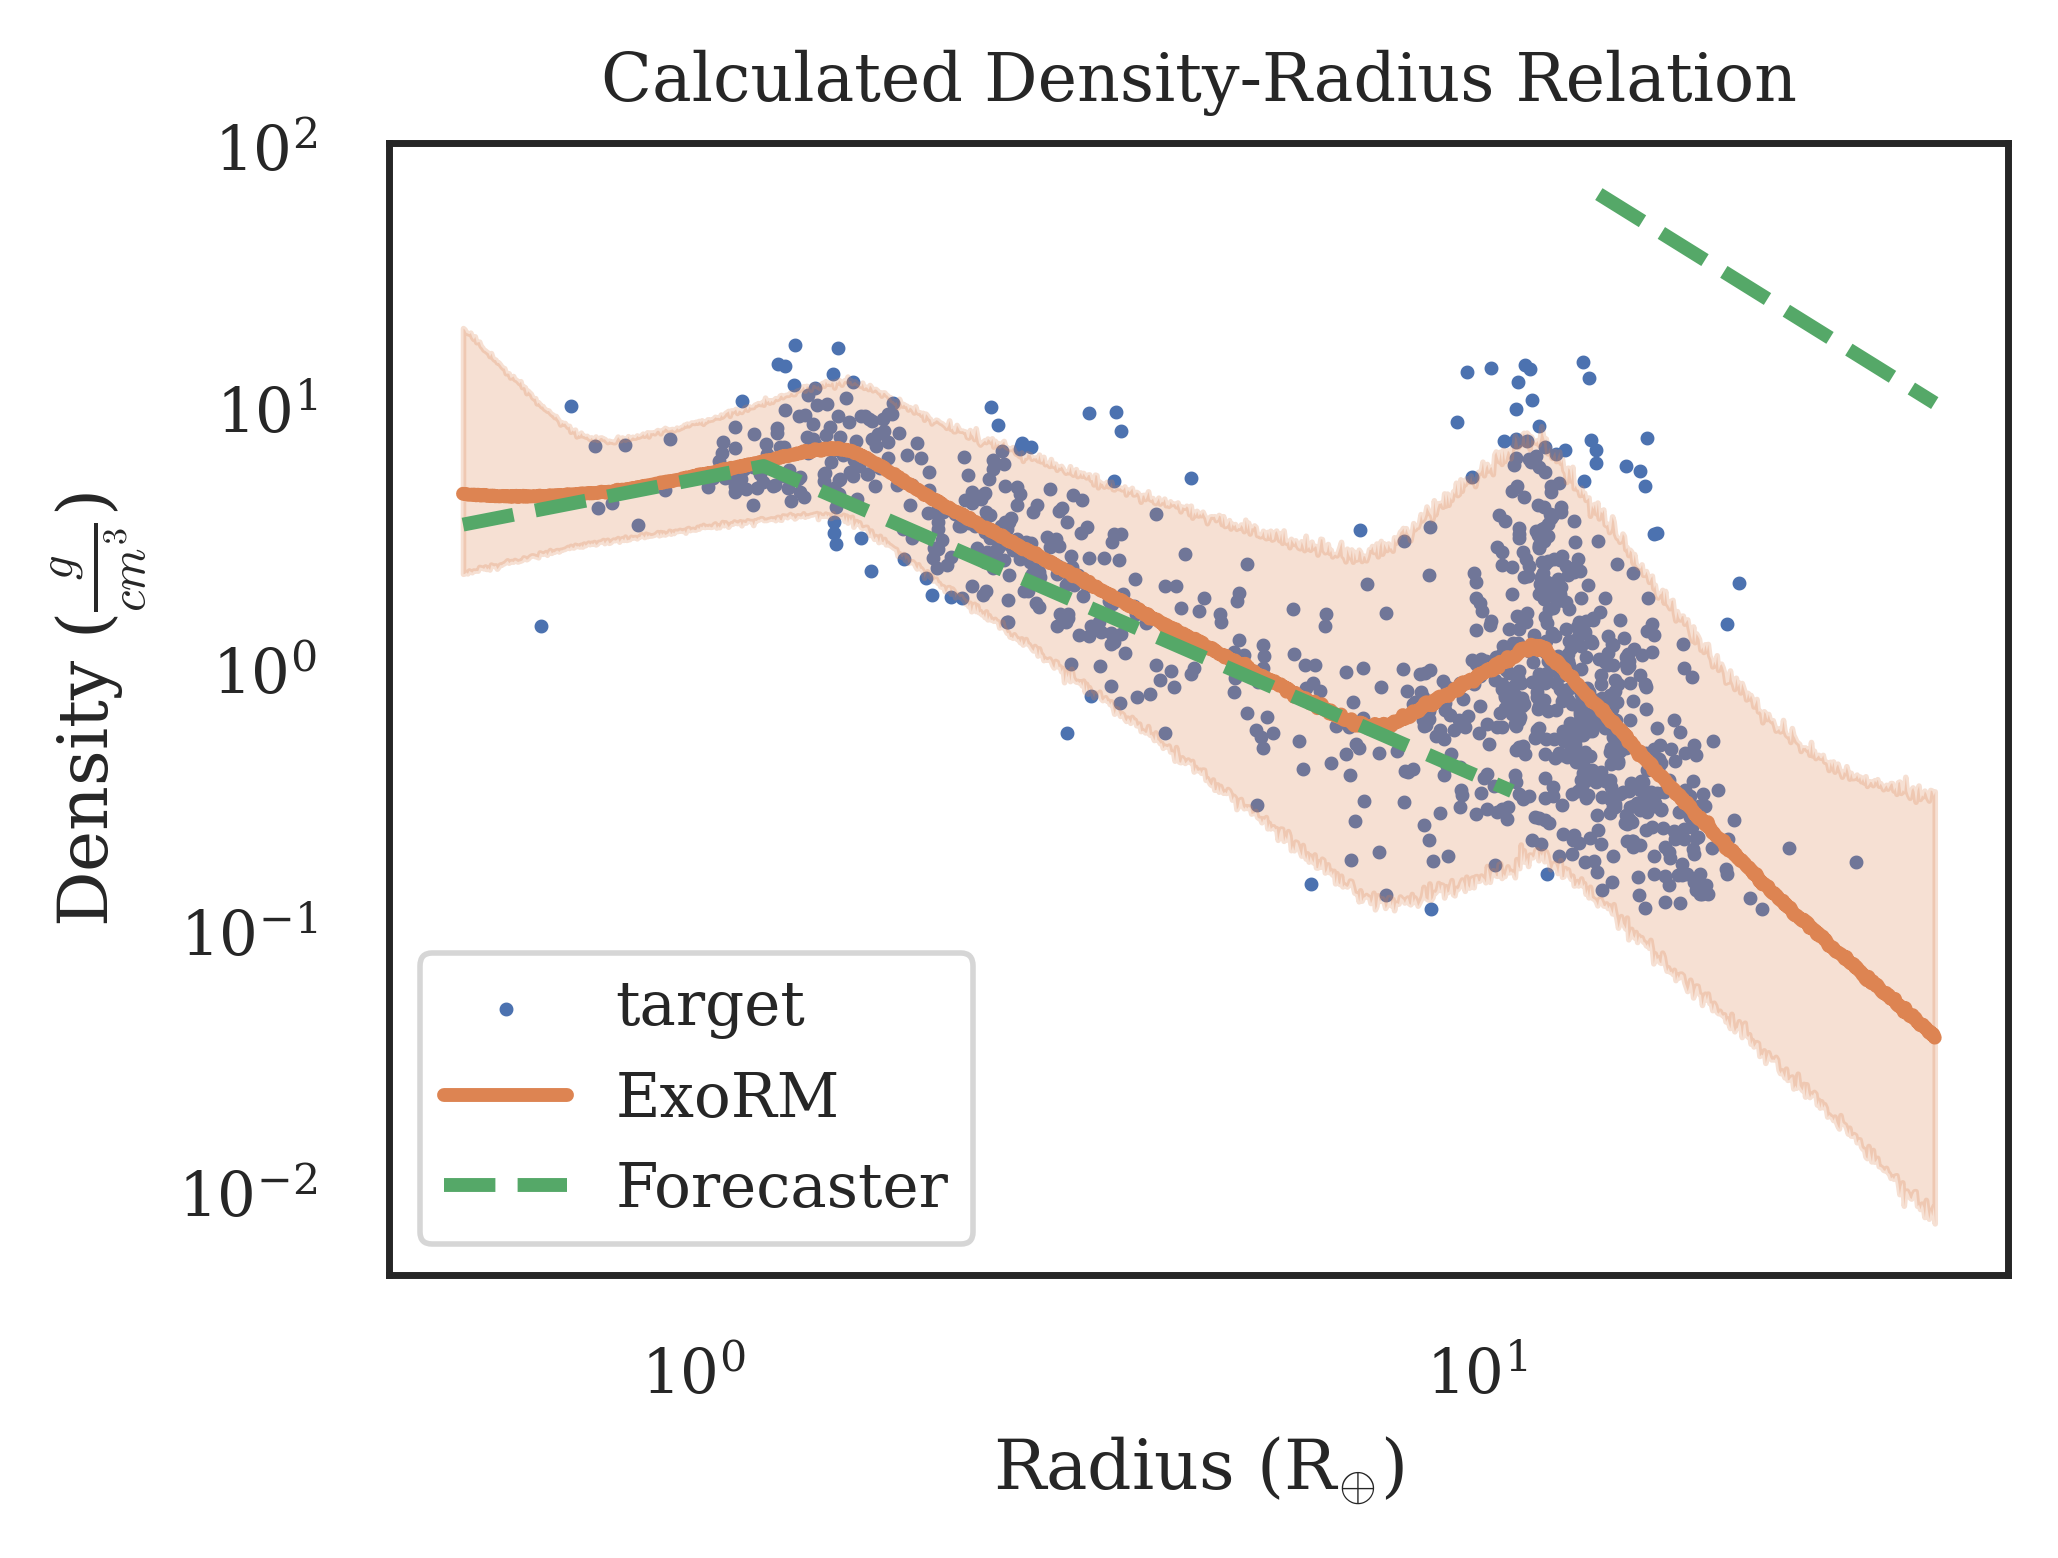

In [7]:
a = numpy.log10(5.51)  # Density of Earth in g / cm^3

plot.scatter(10 ** x, 10 ** ((y - 3 * x) + a))
ds = (numpy.log10(ms) - 3 * xs) + a
ds2 = (ms2 - 3 * xs) + a
plot.plot(10 ** xs, 10 ** ds, color = 'C1')
plot.plot(10 ** xs, 10 ** ds2, '--', color = 'C2')

plot.fill_between(10 ** xs,
                  10 ** (((numpy.log10(lower)) - 3 * xs) + a),
                  10 ** (((numpy.log10(upper)) - 3 * xs) + a),
                  color = 'C1', alpha = 0.25)

plot.legend(['target', 'ExoRM', 'Forecaster'])
plot.xlabel('Radius (R$_{\\oplus}$)')
plot.ylabel('Density (${\\frac{g}{cm^3}}$)')
plot.title('Calculated Density-Radius Relation')

plot.loglog()

# if save: plot.savefig(f'{path}/Figure 4.jpeg')

plot.show()

In [8]:
p_data = data.copy()
columns = ['radius', 'mass']
p_data[columns] = numpy.log10(p_data[columns])
p_data = p_data[(p_data['radius'] < numpy.log10(11.1))].copy()
p_data = p_data.reset_index(drop = True)
p_data

,name,radius,mass,density,error_score
0,55 Cnc e,0.273001,0.902547,1.212113,0.028071
1,CoRoT-10 b,1.036339,2.938358,0.675059,0.061723
2,CoRoT-13 b,0.996512,2.618784,0.425843,0.033143
3,CoRoT-20 b,0.974051,3.129542,1.612089,0.051009
4,CoRoT-28 b,1.029570,2.184340,0.124632,0.092767
...,...,...,...,...,...
474,WASP-80 b,1.043444,2.251931,0.132312,0.035178
475,WASP-84 b,1.023623,2.343537,0.187356,0.031869
476,Wolf 327 b,0.093422,0.403121,1.326953,0.115103
477,Wolf 503 b,0.310268,0.796574,0.734124,0.072398


In [9]:
p_data['ExoRM'] = 10 ** erm(p_data['radius'])
p_data['Forecaster'] = 10 ** ForecasterRM.forecaster(p_data['radius'])
p_data['l_mass'] = 10 ** p_data['mass']
p_data['l_radius'] = 10 ** p_data['radius']
p_data['ExoRM res'] = (p_data['l_mass'] - p_data['ExoRM'])
p_data['Forecaster res'] = (p_data['l_mass'] - p_data['Forecaster'])

p_data['name_len'] = p_data['name'].str.len()
p_data = p_data.sort_values(
    by = ['name_len', 'name'],
).reset_index(drop = True)
p_data = p_data.drop(columns = ['name_len'])

columns = ['l_radius', 'l_mass', 'ExoRM', 'Forecaster', 'ExoRM res', 'Forecaster res']

p_data[columns] = p_data[columns].map(
    lambda x: x if x == 0 or math.isnan(x) else round(x, (5 - 1) - int(math.floor(math.log10(abs(x)))))
)

p_data['Percent ExoRM err'] = 100 * (((p_data['ExoRM']) - (p_data['l_mass'])) / (p_data['l_mass'])).abs()
p_data['Percent Forecaster err'] = 100 * (((p_data['Forecaster']) - (p_data['l_mass'])) / (p_data['l_mass'])).abs()

p_data['SAPE ExoRM'] = 100 * (((p_data['ExoRM']) - (p_data['l_mass'])) / ((p_data['l_mass'] + p_data['ExoRM']) / 2)).abs()
p_data['SAPE Forecaster'] = 100 * (((p_data['Forecaster']) - (p_data['l_mass'])) / ((p_data['l_mass'] + p_data['Forecaster']) / 2)).abs()

p_data['ExoRM lerr'] = ((p_data['ExoRM']) - (p_data['l_mass'])).abs()
p_data['Forecaster lerr'] = ((p_data['Forecaster']) - (p_data['l_mass'])).abs()

p_data['winner'] = p_data.apply(
    lambda x: 'ExoRM' if x['Percent ExoRM err'] < x['Percent Forecaster err'] else 'Forecaster', axis = 1
)

if save: p_data[['name'] + columns + ['winner']].to_csv(f'{path}/ExoRM_results.csv', index = False)

p_data.head(10)

Sampling: [_x_true, y_pred]


Output()

,name,radius,mass,density,error_score,ExoRM,Forecaster,l_mass,l_radius,ExoRM res,Forecaster res,Percent ExoRM err,Percent Forecaster err,SAPE ExoRM,SAPE Forecaster,ExoRM lerr,Forecaster lerr,winner
0,PH2 b,0.970211,1.939943,0.106982,0.136356,124.7700,63.7180,87.085,9.3371,-37.68600,23.36700,43.273813,26.832405,35.576220,30.990100,37.6850,23.3670,Forecaster
1,K2-3 b,0.317646,0.708421,0.569488,0.080316,7.0431,4.9698,5.110,2.0780,-1.93310,0.14016,37.829746,2.743640,31.812459,2.781801,1.9331,0.1402,Forecaster
2,K2-3 d,0.184691,1.045323,3.099193,0.193605,4.5284,2.9554,11.100,1.5300,6.57160,8.14460,59.203604,73.374775,84.098180,115.892824,6.5716,8.1446,ExoRM
3,K2-18 b,0.416641,0.936011,0.485388,0.094882,9.6217,7.3184,8.630,2.6100,-0.99166,1.31160,11.491309,15.198146,10.866933,16.448045,0.9917,1.3116,ExoRM
4,K2-19 b,0.845098,1.510545,0.094461,0.040520,38.6700,39.0700,32.400,7.0000,-6.27040,-6.67030,19.351852,20.586420,17.644576,18.665174,6.2700,6.6700,ExoRM
5,K2-19 c,0.612784,1.033424,0.156701,0.052168,18.0710,15.7550,10.800,4.1000,-7.27090,-4.95530,67.324074,45.879630,50.368882,37.318772,7.2710,4.9550,Forecaster
6,K2-24 b,0.732394,1.278754,0.120663,0.075097,26.6120,25.1480,19.000,5.4000,-7.61170,-6.14770,40.063158,32.357895,33.377181,27.851771,7.6120,6.1480,Forecaster
7,K2-24 c,0.875061,1.187521,0.036504,0.080065,46.6310,43.9260,15.400,7.5000,-31.23100,-28.52600,202.798701,185.233766,100.694814,96.166942,31.2310,28.5260,Forecaster
8,K2-25 b,0.536558,1.389166,0.601853,0.128666,13.8990,11.6950,24.500,3.4400,10.60100,12.80500,43.269388,52.265306,55.214980,70.755629,10.6010,12.8050,ExoRM
9,K2-27 b,0.651278,1.489958,0.343656,0.100103,20.1700,18.3140,30.900,4.4800,10.73000,12.58600,34.724919,40.731392,42.020756,51.148047,10.7300,12.5860,ExoRM


In [10]:
p_data[['Percent ExoRM err', 'Percent Forecaster err', 'SAPE ExoRM', 'SAPE Forecaster', 'ExoRM res', 'Forecaster res', 'ExoRM lerr', 'Forecaster lerr']].abs().describe()

,Percent ExoRM err,Percent Forecaster err,SAPE ExoRM,SAPE Forecaster,ExoRM res,Forecaster res,ExoRM lerr,Forecaster lerr
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,48.034203,42.131502,39.862550,49.013812,44.342474,51.639867,44.341983,51.639696
std,62.707630,38.213629,34.553844,38.765711,197.949120,216.673375,197.945429,216.671778
min,0.324159,0.061789,0.323634,0.061808,0.041705,0.003762,0.041700,0.003800
25%,12.984100,19.333470,12.909999,18.890255,0.989155,1.390400,0.989350,1.390400
50%,30.380952,34.531562,31.613945,38.929355,3.759100,3.976700,3.759000,3.977000
75%,56.565614,55.733742,54.812245,70.636600,16.813000,17.413500,16.812950,17.413600
max,515.721088,388.671875,175.231414,189.867379,2745.900000,2879.000000,2745.850000,2878.979000


In [11]:
p_data['winner'].value_counts() / len(p_data), (p_data['winner'].value_counts()['ExoRM'] / len(p_data)) - (p_data['winner'].value_counts()['Forecaster'] / len(p_data))

(winner
 ExoRM         0.620042
 Forecaster    0.379958
 Name: count, dtype: float64,
 0.24008350730688938)

In [12]:
_x = x[x < numpy.log10(11.1)]
numpy.mean(erm(_x) - ForecasterRM.forecaster(_x))
# average change metween two models in the < 11.1 radius

Sampling: [_x_true, y_pred]


Output()

0.1570299162384243

In [13]:
comparison = pandas.DataFrame(
    [[10 ** numpy.mean(erm(_x)), 10 ** numpy.mean(ForecasterRM.forecaster(_x))],
     [p_data['ExoRM lerr'].mean(), p_data['Forecaster lerr'].mean()],
     [p_data['ExoRM lerr'].max(), p_data['Forecaster lerr'].max()],
     [p_data['Percent ExoRM err'].mean(), p_data['Percent Forecaster err'].mean()],
     [p_data['Percent ExoRM err'].median(), p_data['Percent Forecaster err'].median()],
     [p_data['SAPE ExoRM'].mean(), p_data['SAPE Forecaster'].mean()],
     ],
    columns = ['ExoRM', 'Forecaster'])

comparison['Difference'] = comparison['ExoRM'] - comparison['Forecaster']

comparison = comparison.map(
    lambda x: x if x == 0 or math.isnan(x) else round(x, (5 - 1) - int(math.floor(math.log10(abs(x)))))
)

if save: comparison.to_csv(f'{path}/filtered_comparison.csv', index = False)

comparison

Sampling: [_x_true, y_pred]


Output()

,ExoRM,Forecaster,Difference
0,16.372,11.398,4.9738
1,44.342,51.640,-7.2977
2,2745.900,2879.000,-133.1300
3,48.034,42.132,5.9027
4,30.381,34.532,-4.1506
5,39.863,49.014,-9.1513


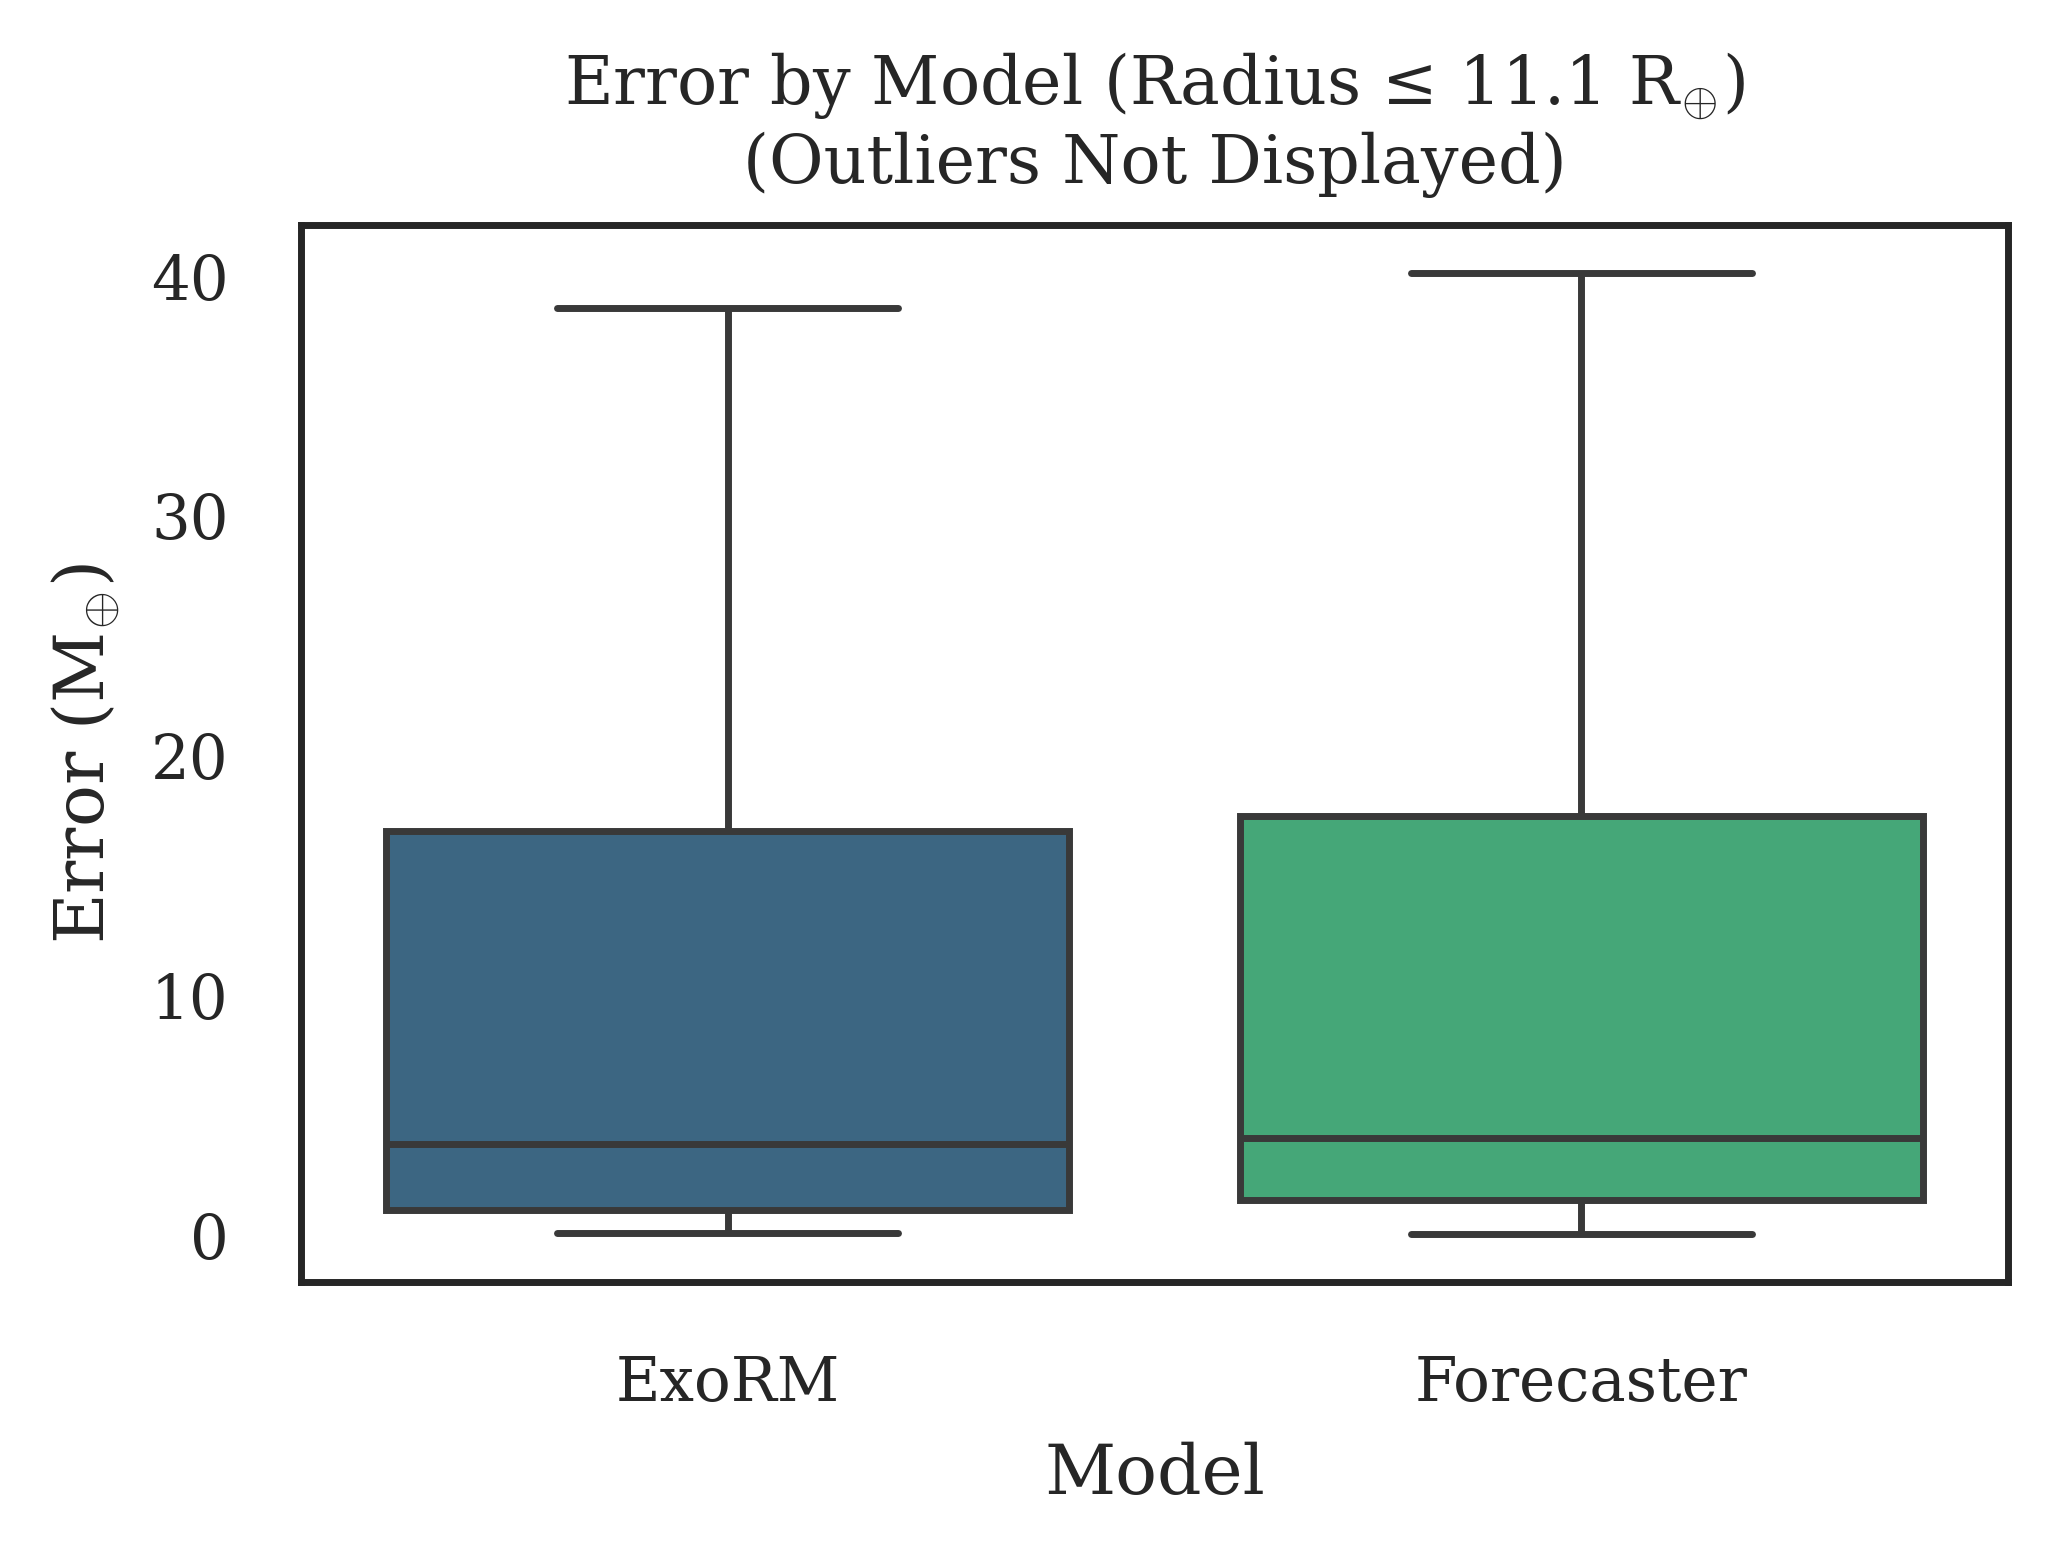

In [14]:
p_data_long = pandas.melt(
    p_data,
    value_vars = ['ExoRM lerr', 'Forecaster lerr'],
    var_name = 'Model',
    value_name = 'Error (M$_{\\oplus}$)'
)

p_data_long['Model'] = p_data_long['Model'].map(lambda x: 'ExoRM' if x == 'ExoRM lerr' else 'Forecaster')

ax = seaborn.boxplot(data = p_data_long, x = 'Model', y = 'Error (M$_{\\oplus}$)', hue = 'Model', palette = 'viridis', zorder = 1, whis = 1.5, showfliers = False)

plot.title('Error by Model (Radius ≤ 11.1 R$_{\\oplus}$)\n(Outliers Not Displayed)')
# plot.yscale('log')

if save: plot.savefig(f'{path}/Figure 3.jpeg')

plot.show()

In [15]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(p_data['ExoRM lerr'], p_data['Forecaster lerr'])
stat, p

(-3.5220072594627467, 0.0004693815213814414)

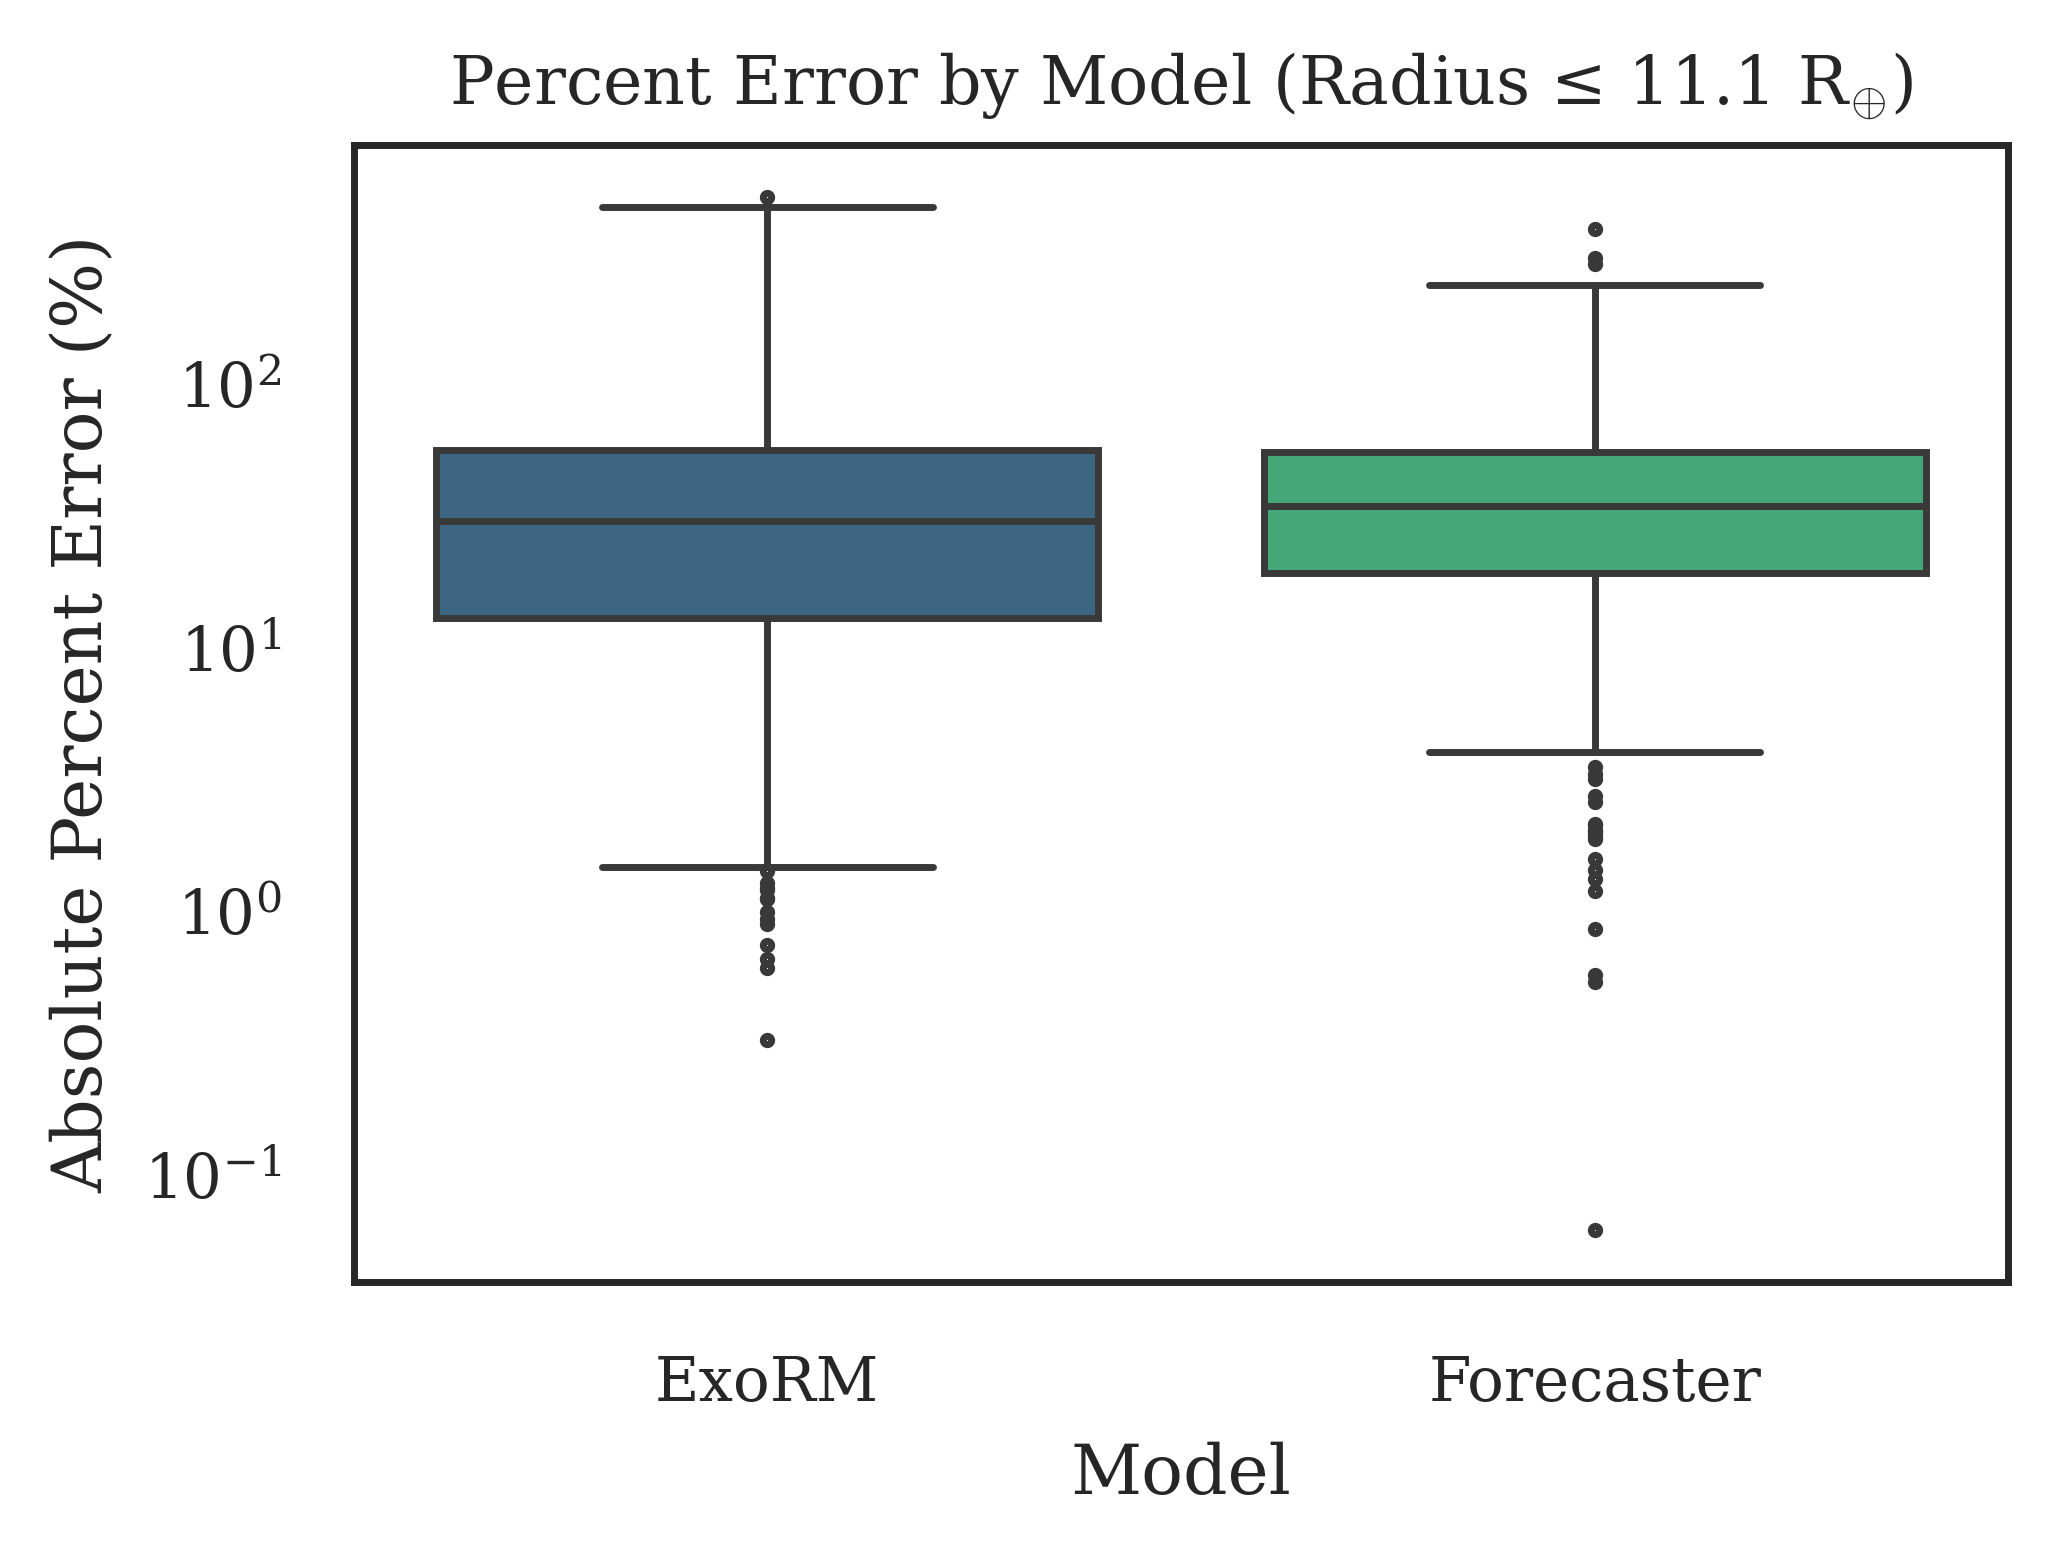

,Model,Absolute Percent Error (%)
0,ExoRM,43.273813
1,ExoRM,37.829746
2,ExoRM,59.203604
3,ExoRM,11.491309
4,ExoRM,19.351852
...,...,...
953,Forecaster,55.769231
954,Forecaster,41.877885
955,Forecaster,49.013714
956,Forecaster,11.015678


In [16]:
p_data_long = pandas.melt(
    p_data,
    value_vars = ['Percent ExoRM err', 'Percent Forecaster err'],
    var_name = 'Model',
    value_name = 'Absolute Percent Error (%)'
)

p_data_long['Model'] = p_data_long['Model'].map(lambda x: 'ExoRM' if x == 'Percent ExoRM err' else 'Forecaster')

ax = seaborn.boxplot(data = p_data_long, x = 'Model', y = 'Absolute Percent Error (%)', hue = 'Model', palette = 'viridis', zorder = 1, whis = 1.5, showfliers = True, log_scale = True)

plot.title('Percent Error by Model (Radius ≤ 11.1 R$_{\\oplus}$)')

plot.show()

p_data_long

In [17]:
exoplanet_data = read_rm_data()
exoplanet_data = preprocess_data(exoplanet_data)
new_exoplanet_data = exoplanet_data[exoplanet_data['pl_pubdate'] >= '2018']
old_exoplanet_data = exoplanet_data[exoplanet_data['pl_pubdate'] < '2018']
new_exoplanet_data, old_exoplanet_data

(                 name     radius         mass  error_score  pl_pubdate  \
 1            55 Cnc e   1.875000     7.990000     0.028071  2018-10-01   
 2        BD-14 3065 b  21.590000  3932.000000     0.060558  2024-03-01   
 3    CFHTWIR-Oph 98 b  20.848704  2479.061575     0.061518  2020-12-01   
 11         CoRoT-18 b  12.845514  1048.839000     0.047767  2019-02-01   
 17         CoRoT-30 b  11.309881   921.707000     0.075592  2020-03-01   
 ..                ...        ...          ...          ...         ...   
 935         WASP-76 b  20.781450   284.138596     0.028181  2020-04-01   
 960        Wolf 327 b   1.240000     2.530000     0.115103  2024-01-01   
 961        Wolf 503 b   2.043000     6.260000     0.072398  2021-12-01   
 967            XO-7 b  15.356304   225.658169     0.032076  2024-10-01   
 968          pi Men c   2.110000     4.300000     0.093244  2020-10-01   
 
      pl_radeerr1  pl_radeerr2  pl_bmasseerr1  pl_bmasseerr2   density  
 1       0.029000    -0.0

In [18]:
len(new_exoplanet_data) / len(exoplanet_data)

0.6862745098039216

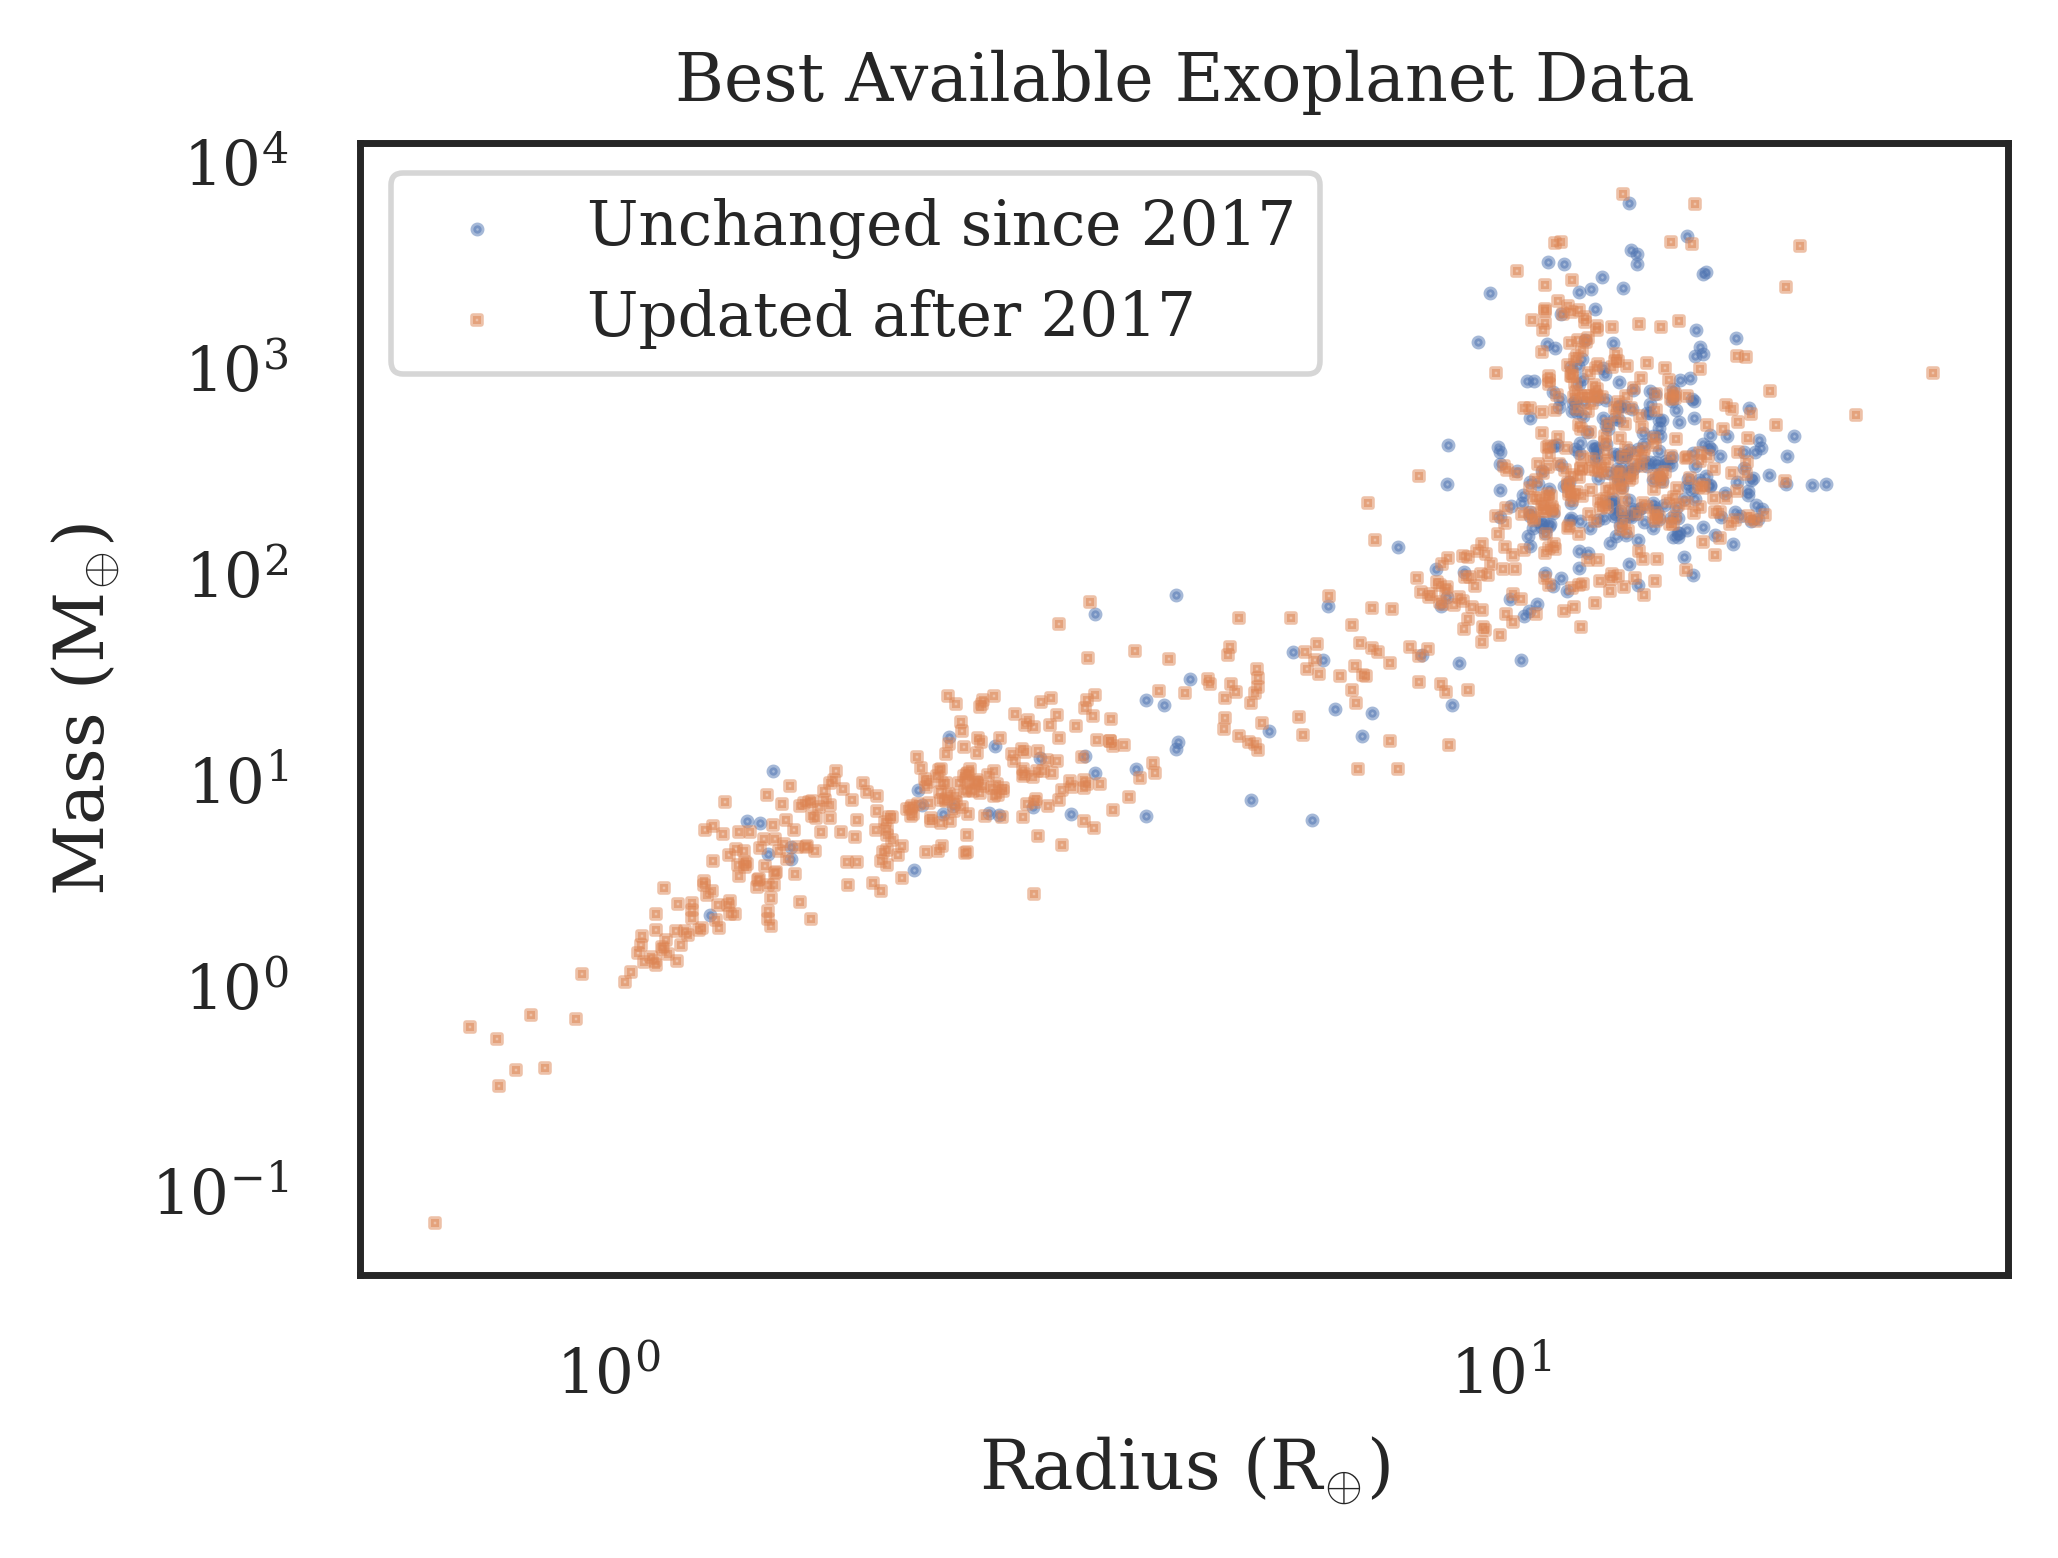

In [19]:
plot.scatter(old_exoplanet_data['radius'], old_exoplanet_data['mass'], marker = 'o', alpha = 0.5)
plot.scatter(new_exoplanet_data['radius'], new_exoplanet_data['mass'], marker = 's', alpha = 0.5)

plot.legend(['Unchanged since 2017', 'Updated after 2017'])
plot.xlabel('Radius (R$_{\\oplus}$)')
plot.ylabel('Mass (M$_{\\oplus}$)')
plot.title('Best Available Exoplanet Data')

plot.loglog()

if save: plot.savefig(f'{path}/Figure 1.jpeg')

plot.show()

In [20]:
import arviz
# arviz.plot_pair(
#     erm.trace,
#     var_names = ['ell', 'eta', 'ell_sigma', 'eta_sigma'],
#     kind = 'kde',
#     marginals = True
# )

plot.show()